In [2]:

'''
Coded by Mohamed Osama Ahmed Anwar

'''

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
data = pd.read_csv('house_data.csv')

Dataset Exploration:

In [51]:
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [53]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

    There is no nans
    

Our Target is the Price 


In [54]:
data.drop(['id','date','zipcode'],axis=1,inplace=True)

In [55]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [56]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

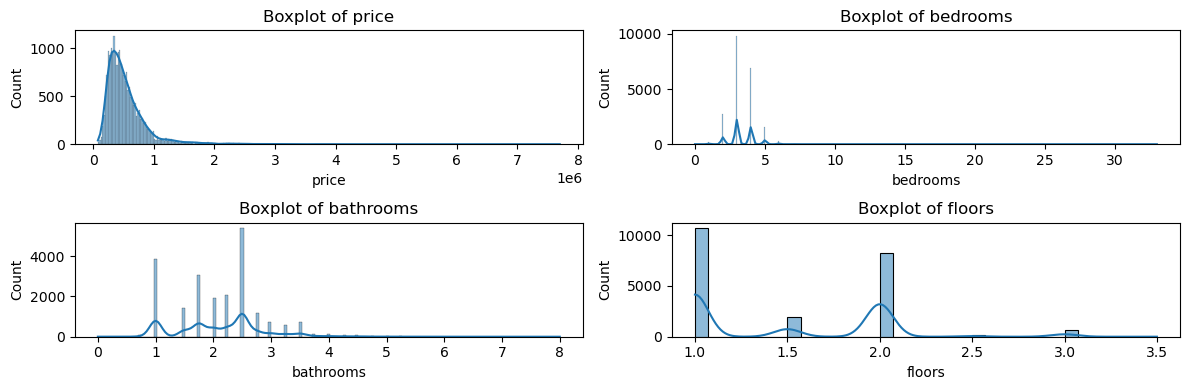

In [57]:
fig, axs = plt.subplots(2,2, figsize=(12, 4))

# Iterate over the columns and create the box plots
columns = ['price', 'bedrooms', 'bathrooms', 'floors']
for i, col in enumerate(columns):
    ax = axs[i//2, i%2]
    sns.histplot(x=data[col], ax=ax,kde = True)
    ax.set_title(f"Boxplot of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()

In [44]:
"""  

price               Our target 


                    
                    features

bedrooms            1
bathrooms           1
sqft_living         1
sqft_lot            0
floors              1
waterfront          1
view                1
condition           1
grade               1
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0

"""

'  \n\nprice               Our target \n\n\n                    \n                    features\n\nbedrooms            1\nbathrooms           1\nsqft_living         1\nsqft_lot            0\nfloors              1\nwaterfront          1\nview                1\ncondition           1\ngrade               1\nsqft_above          0\nsqft_basement       0\nyr_built            0\nyr_renovated        0\nlat                 0\nlong                0\nsqft_living15       0\nsqft_lot15          0\n\n'

Exploratory Data Analysis (EDA):

In [58]:

def mean_score_summary(data,col) :
    # Given a dataFrame and the column name, this function calculates and returns :
    # A sorted mean of the three test scores grouped by the categories in column "col"  
    output = data.groupby([col])[['price']].agg(np.mean)
    return display(output)

<Axes: xlabel='bedrooms', ylabel='count'>

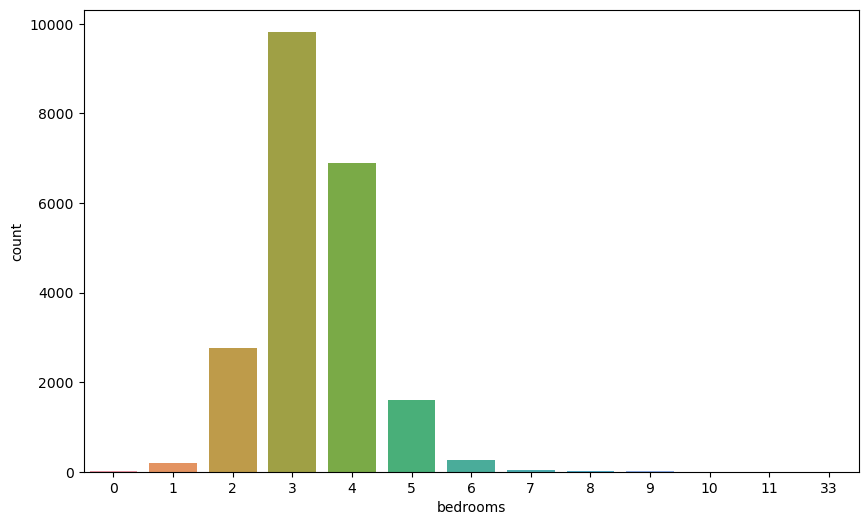

In [59]:

plt.figure(figsize=(10, 6))
sns.countplot(x=data['bedrooms'])

In [60]:
mean_score_summary(data,'bedrooms')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_3740\1408772377.py:4: FutureWarning: The provided callable <function mean at 0x000001B3C2274C20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
bedrooms,
0,4.095038e+05
1,3.176429e+05
2,4.013727e+05
3,4.662321e+05
4,6.354195e+05
5,7.865998e+05
6,8.255206e+05
7,9.511847e+05
8,1.105077e+06


<Axes: xlabel='bathrooms', ylabel='count'>

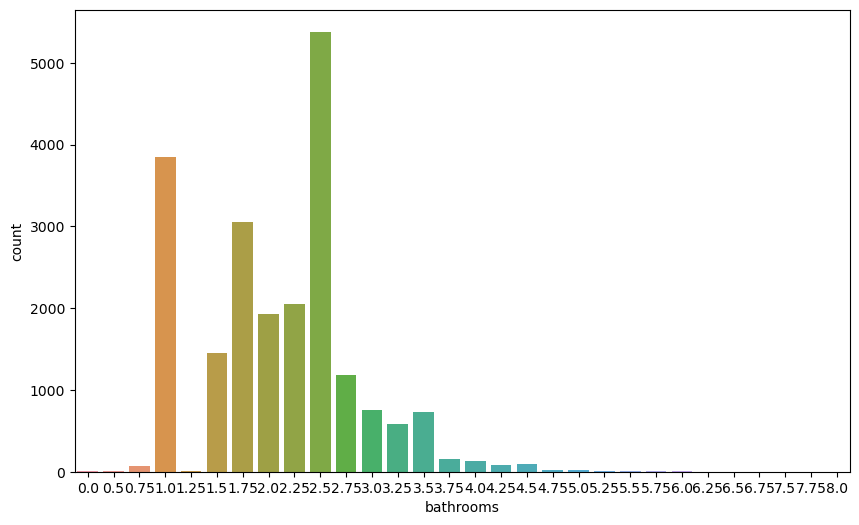

In [61]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['bathrooms'])

In [62]:
mean_score_summary(data,'bathrooms')


C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_3740\1408772377.py:4: FutureWarning: The provided callable <function mean at 0x000001B3C2274C20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
bathrooms,
0.00,4.481600e+05
0.50,2.373750e+05
0.75,2.945209e+05
1.00,3.470412e+05
1.25,6.212167e+05
1.50,4.093222e+05
1.75,4.548961e+05
2.00,4.578897e+05
2.25,5.336768e+05


<Axes: xlabel='sqft_living', ylabel='count'>

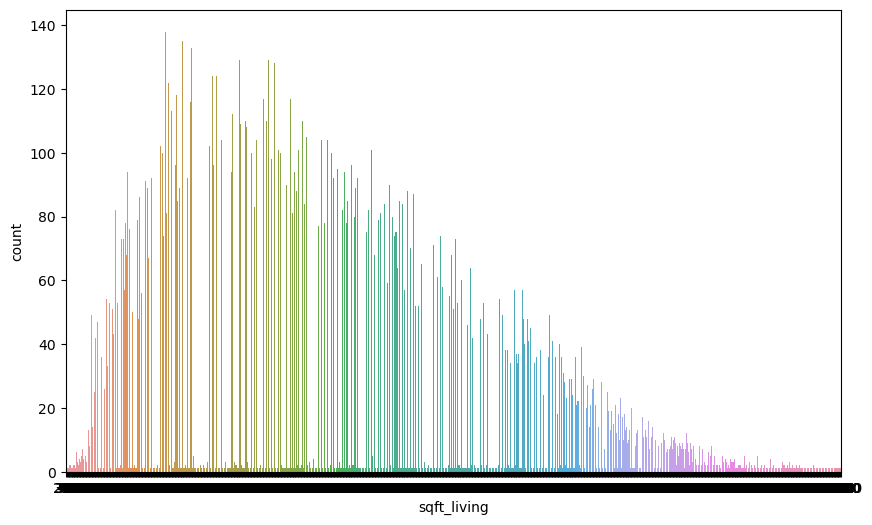

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['sqft_living'])

In [ ]:
mean_score_summary(data,'sqft_living')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_10852\1408772377.py:4: FutureWarning: The provided callable <function mean at 0x000002AD45BB4B80> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
sqft_living,
290,142000.0
370,276000.0
380,245000.0
384,265000.0
390,236500.0
...,...
9640,4668000.0
9890,6885000.0
10040,7062500.0


<Axes: xlabel='sqft_lot', ylabel='count'>

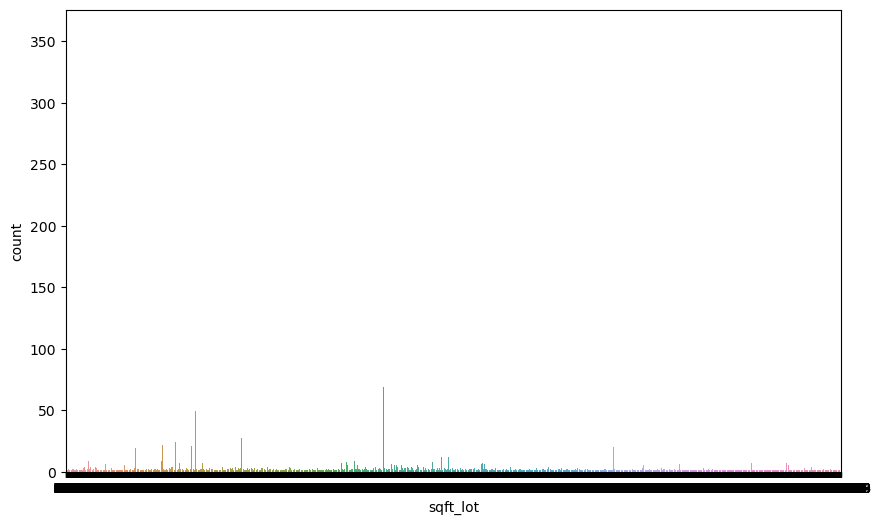

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['sqft_lot'])

In [ ]:
mean_score_summary(data,'sqft_lot')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
sqft_lot,
520,700000.0
572,250000.0
600,367500.0
609,1234570.0
635,256950.0
...,...
982998,998000.0
1024068,855000.0
1074218,542500.0


<Axes: xlabel='floors', ylabel='count'>

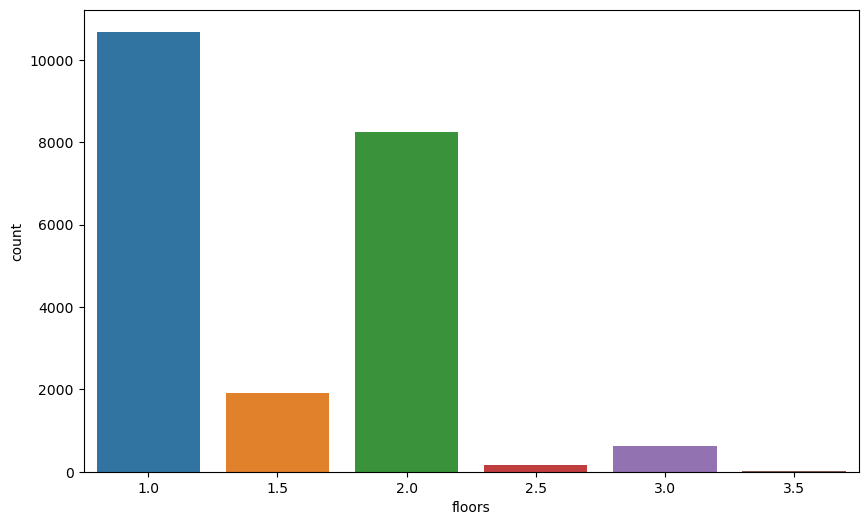

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['floors'])

In [ ]:
mean_score_summary(data,'floors')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
floors,
1.0,4.421806e+05
1.5,5.589806e+05
2.0,6.488912e+05
2.5,1.060346e+06
3.0,5.825260e+05
3.5,9.333125e+05


<Axes: xlabel='waterfront', ylabel='count'>

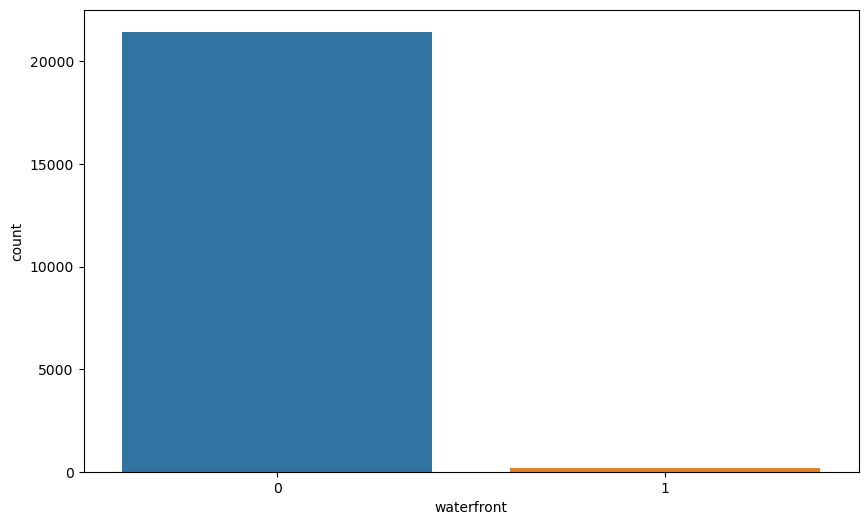

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['waterfront'])

In [ ]:
mean_score_summary(data,'waterfront')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
waterfront,
0,5.315636e+05
1,1.661876e+06


<Axes: xlabel='view', ylabel='count'>

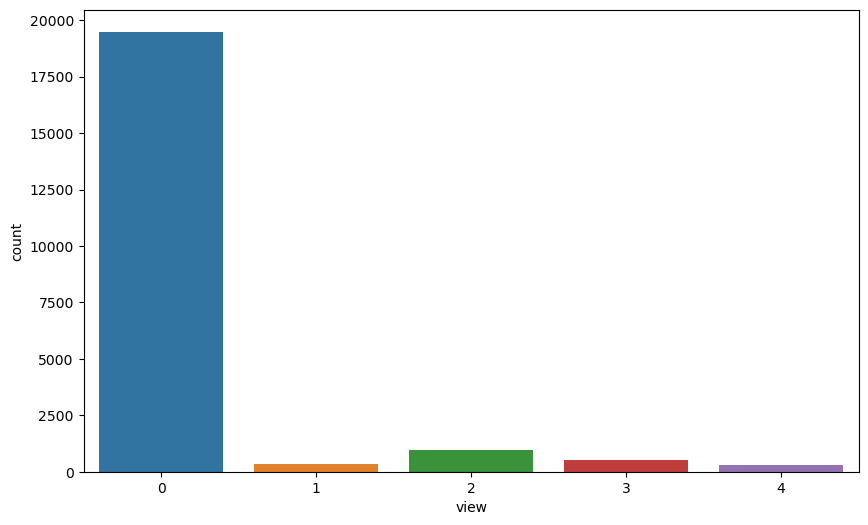

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['view'])

In [ ]:
mean_score_summary(data,'view')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
view,
0,4.965642e+05
1,8.122808e+05
2,7.924009e+05
3,9.719653e+05
4,1.463711e+06


<Axes: xlabel='condition', ylabel='count'>

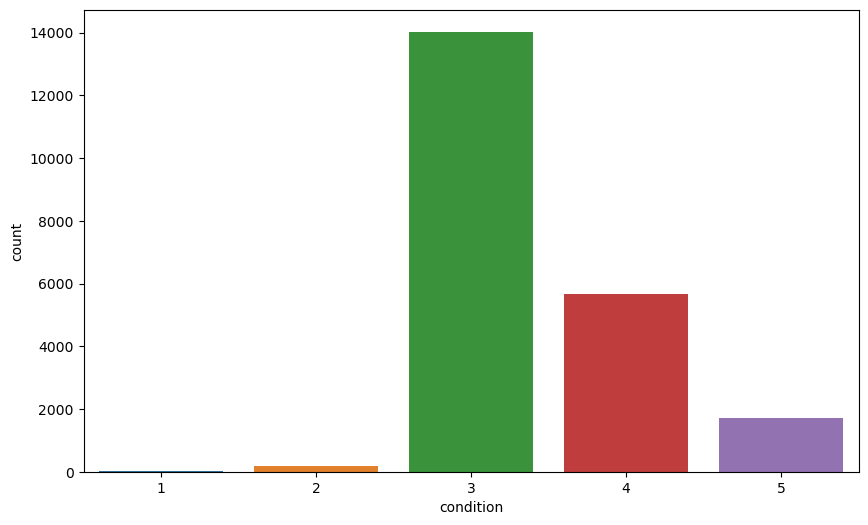

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['condition'])

In [ ]:
mean_score_summary(data,'condition')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
condition,
1,334431.666667
2,327287.145349
3,542012.578148
4,521200.390033
5,612418.089359


<Axes: xlabel='grade', ylabel='count'>

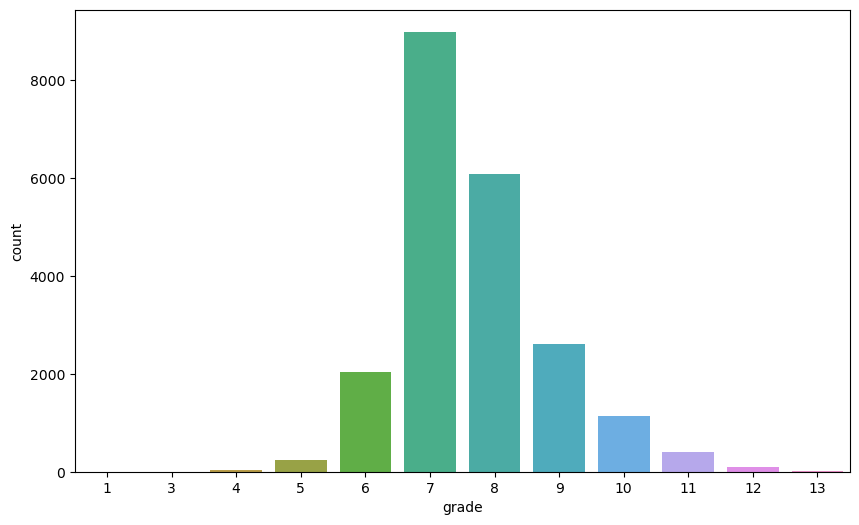

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['grade'])

In [ ]:
mean_score_summary(data,'grade')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
grade,
1,1.420000e+05
3,2.056667e+05
4,2.143810e+05
5,2.485240e+05
6,3.019196e+05
7,4.025903e+05
8,5.428528e+05
9,7.735132e+05
10,1.071771e+06


<Axes: xlabel='sqft_above', ylabel='count'>

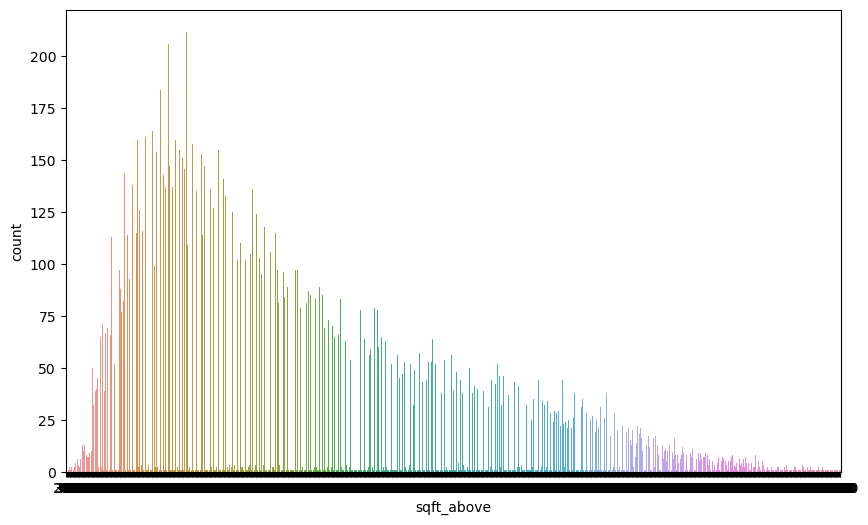

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x=data['sqft_above'])

In [ ]:
mean_score_summary(data,'sqft_above')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
sqft_above,
290,142000.0
370,276000.0
380,245000.0
384,265000.0
390,236500.0
...,...
7880,2415000.0
8020,3300000.0
8570,7700000.0


<Axes: xlabel='sqft_basement', ylabel='count'>

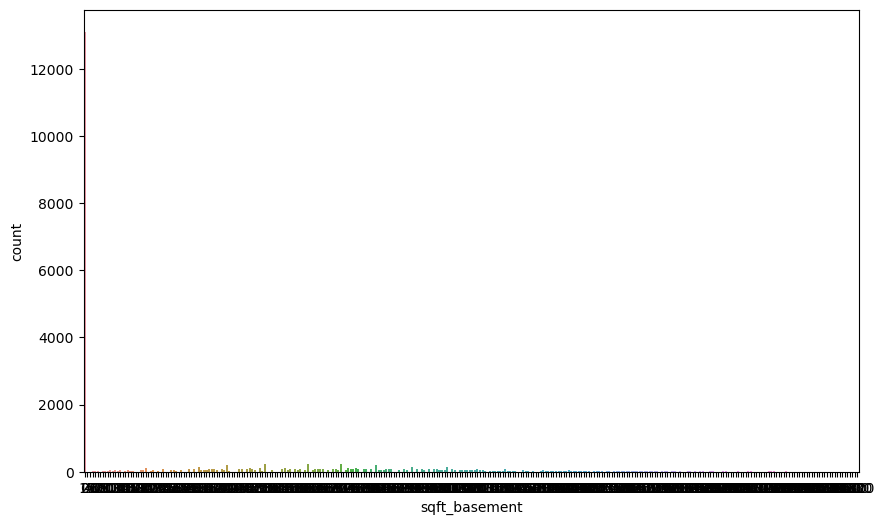

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x=data['sqft_basement'])

In [ ]:
mean_score_summary(data,'sqft_basement')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
sqft_basement,
0,4.868841e+05
10,1.919000e+05
20,4.850000e+05
40,4.004250e+05
50,4.773580e+05
...,...
3260,1.900000e+06
3480,7.700000e+06
3500,3.200000e+06


<Axes: xlabel='yr_built', ylabel='count'>

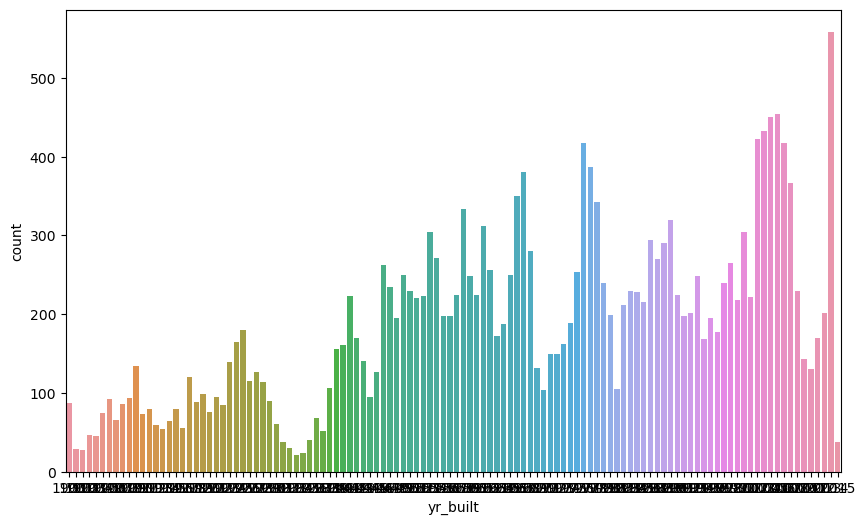

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x=data['yr_built'])

In [ ]:
mean_score_summary(data,'yr_built')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
yr_built,
1900,581387.206897
1901,556935.931034
1902,673007.407407
1903,480958.195652
1904,583756.644444
...,...
2011,544522.000000
2012,527447.335294
2013,678545.452736


<Axes: xlabel='yr_renovated', ylabel='count'>

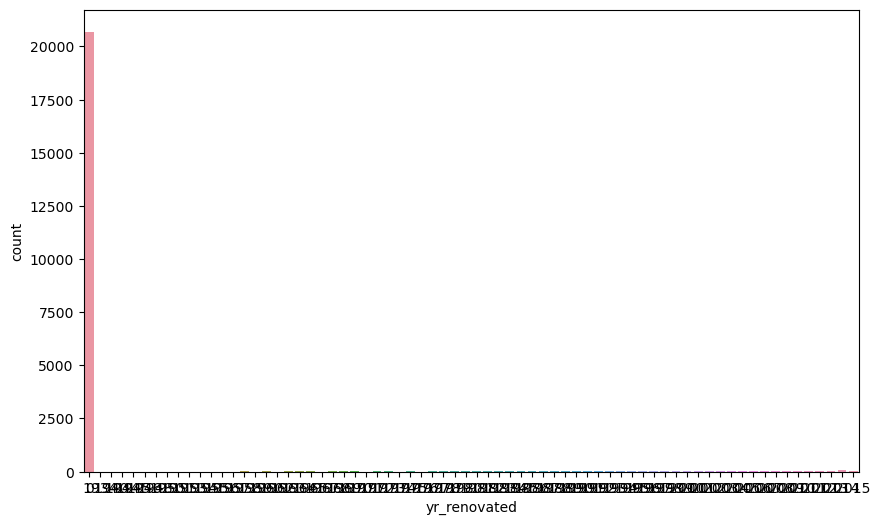

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x=data['yr_renovated'])

In [ ]:
mean_score_summary(data,'yr_renovated')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
yr_renovated,
0,530360.818155
1934,459950.000000
1940,378400.000000
1944,521000.000000
1945,398666.666667
...,...
2011,607496.153846
2012,625181.818182
2013,664663.513514


<Axes: xlabel='lat', ylabel='count'>

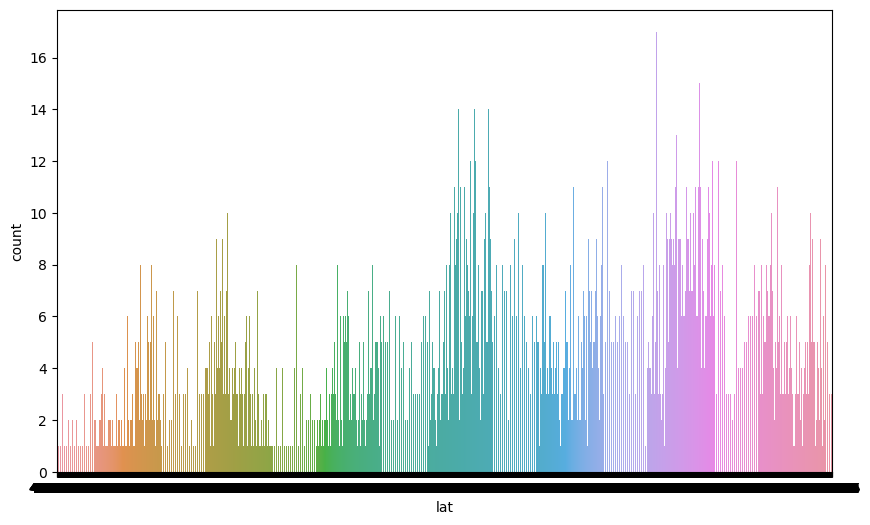

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=data['lat'])

In [ ]:
mean_score_summary(data,'lat')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
lat,
47.1559,380000.000000
47.1593,687000.000000
47.1622,750000.000000
47.1647,335000.000000
47.1764,245000.000000
...,...
47.7771,452475.000000
47.7772,416666.666667
47.7774,395000.000000


<Axes: xlabel='sqft_living15', ylabel='count'>

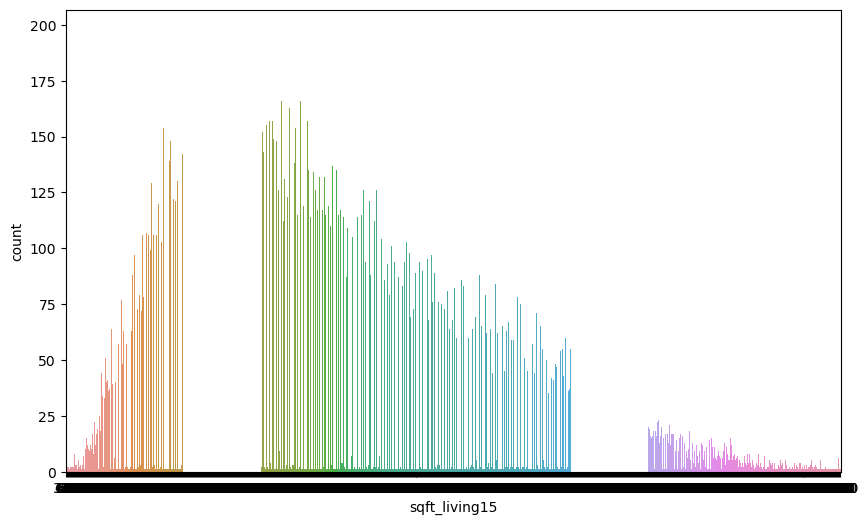

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x=data['sqft_living15'])

In [ ]:
mean_score_summary(data,'sqft_living15')

C:\Users\mohamed osama\AppData\Local\Temp\ipykernel_13684\1799346861.py:4: FutureWarning: The provided callable <function mean at 0x00000248114C4A40> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  output = data.groupby([col])[['price']].agg(np.mean)


,price
sqft_living15,
399,5.360000e+05
460,3.177500e+05
620,2.600000e+05
670,3.140000e+05
690,2.420000e+05
...,...
5600,1.250000e+06
5610,1.950000e+06
5790,1.600333e+06


In [63]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [64]:
"""
Our features that affect the target price
bedrooms            1
bathrooms           1
sqft_living         1
floors              1
waterfront          1
view                1
condition           1
grade               1  

"""
data.drop(['sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15'],axis=1,inplace=True)


In [65]:
data

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade
0,221900.0,3,1.00,1180,1.0,0,0,3,7
1,538000.0,3,2.25,2570,2.0,0,0,3,7
2,180000.0,2,1.00,770,1.0,0,0,3,6
3,604000.0,4,3.00,1960,1.0,0,0,5,7
4,510000.0,3,2.00,1680,1.0,0,0,3,8
...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,3,8
21609,400000.0,4,2.50,2310,2.0,0,0,3,8
21610,402101.0,2,0.75,1020,2.0,0,0,3,7
21611,400000.0,3,2.50,1600,2.0,0,0,3,8


c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

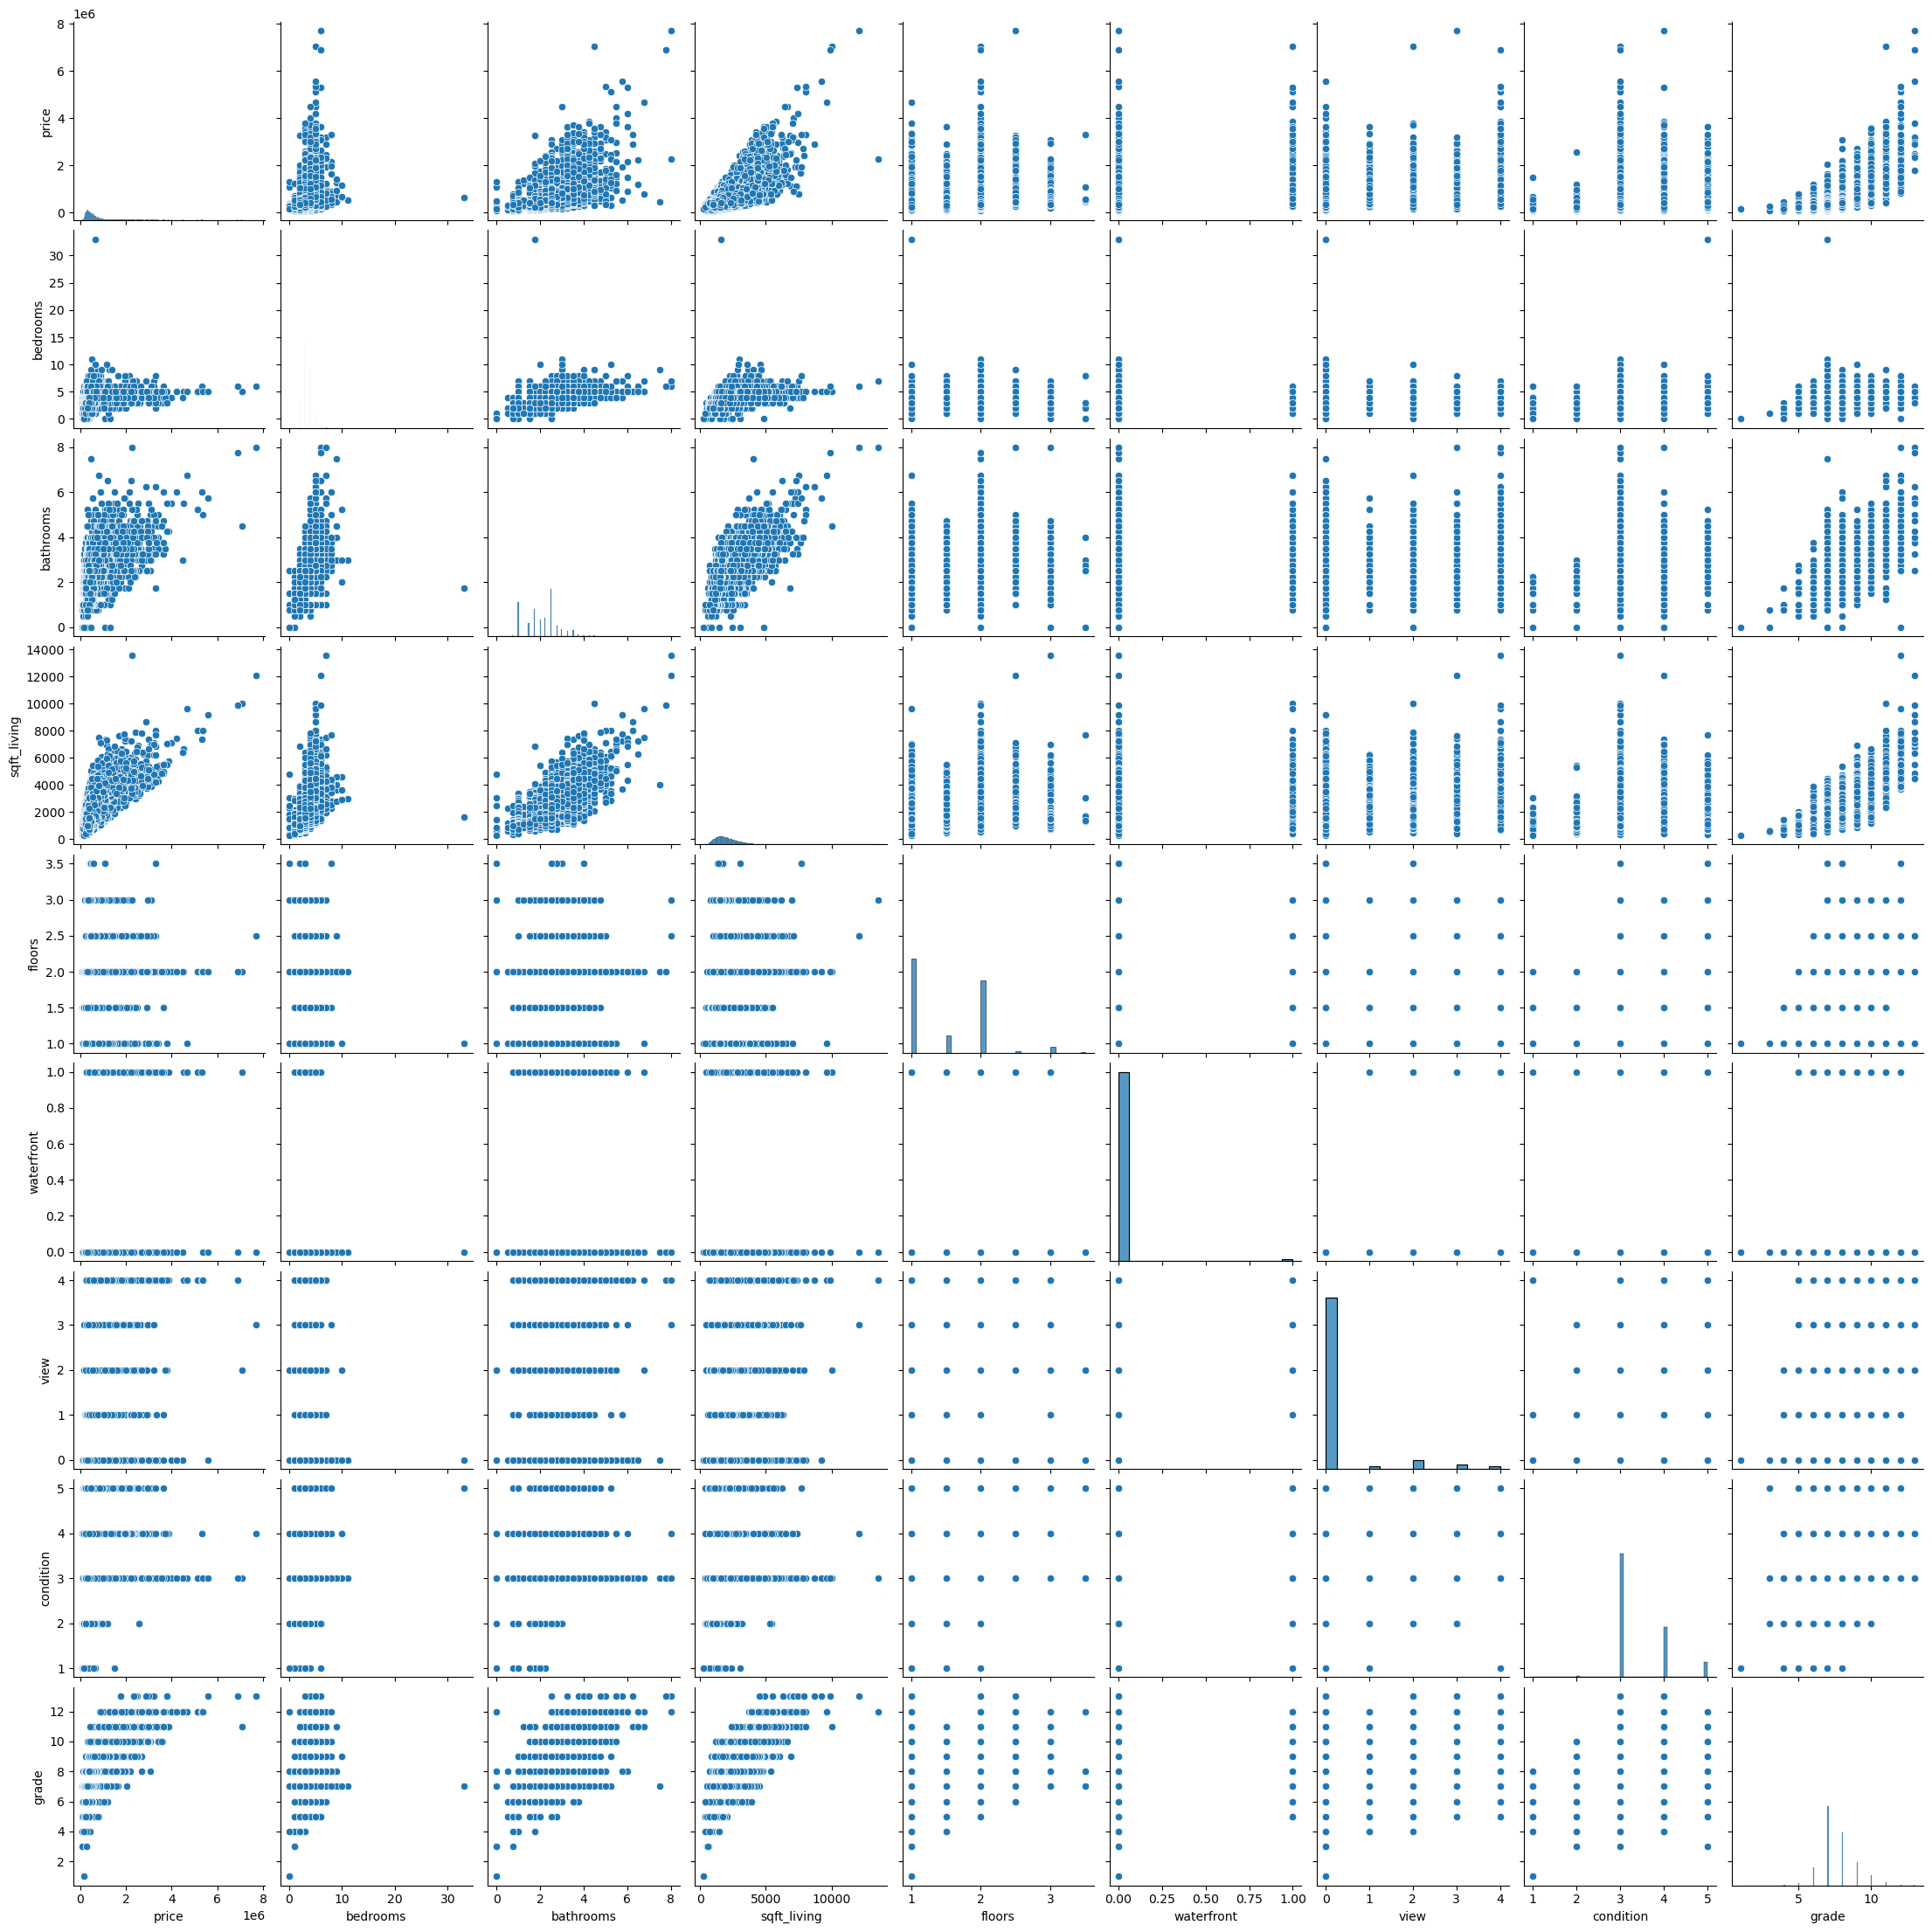

In [ ]:
sns.pairplot(data)

<Axes: >

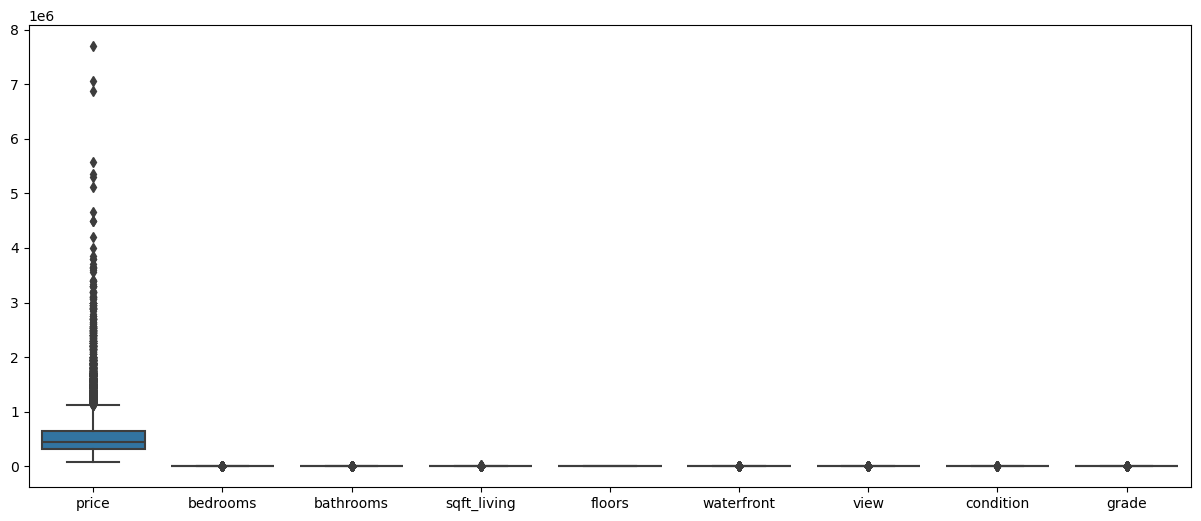

In [66]:
#  Visualization:
f,ax=plt.subplots(figsize=(15,6))
sns.boxplot(data)

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


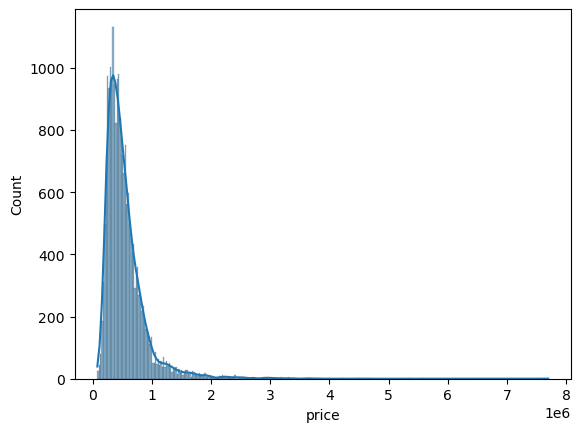

In [67]:
sns.histplot(x=data['price'],kde = True)
plt.show()

In [69]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,0.007542,0.234303,3.409430,7.656873
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,0.086517,0.766318,0.650743,1.175459
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,0.000000,0.000000,3.000000,7.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,0.000000,0.000000,3.000000,7.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,0.000000,0.000000,4.000000,8.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.000000,4.000000,5.000000,13.000000


In [70]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Set a threshold (e.g., 1.5 times IQR)
threshold = 1.5

# Identify outliers
outliers_mask = ((data['price']< Q1 - threshold * IQR) | (data['price']> Q3 + threshold * IQR))

# Remove outliers
df_no_outliers = data[~outliers_mask]

c:\Users\mohamed osama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


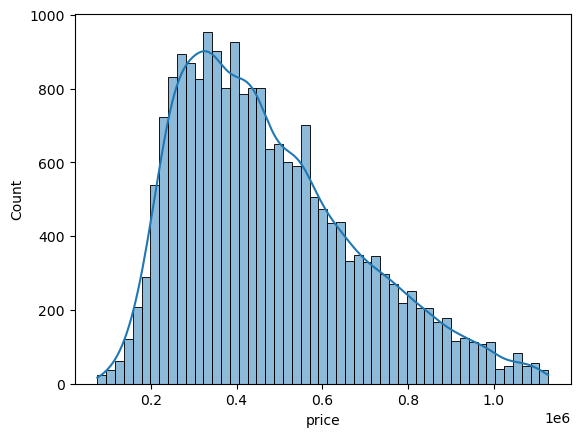

In [71]:
sns.histplot(x=df_no_outliers['price'],kde = True)
plt.show()

In [72]:
df_no_outliers

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade
0,221900.0,3,1.00,1180,1.0,0,0,3,7
1,538000.0,3,2.25,2570,2.0,0,0,3,7
2,180000.0,2,1.00,770,1.0,0,0,3,6
3,604000.0,4,3.00,1960,1.0,0,0,5,7
4,510000.0,3,2.00,1680,1.0,0,0,3,8
...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,3,8
21609,400000.0,4,2.50,2310,2.0,0,0,3,8
21610,402101.0,2,0.75,1020,2.0,0,0,3,7
21611,400000.0,3,2.50,1600,2.0,0,0,3,8


<Axes: >

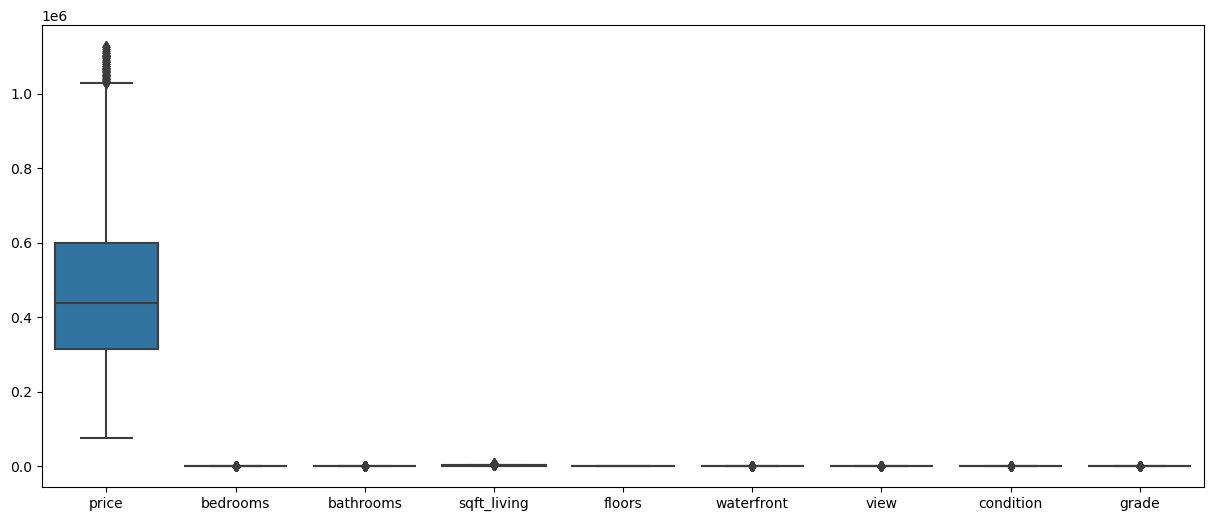

In [73]:
f,ax=plt.subplots(figsize=(15,6))
sns.boxplot(df_no_outliers)

(4093, 8)
(16374, 8)
(4093,)
(16374,)


scaling


In [75]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler

ScalerNo = MinMaxScaler()# x- min / max - min 

# Fit and transform the numerical features
df_scaled = pd.DataFrame(ScalerNo.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

# Display the DataFrame with Min-Max scaled values
df_scaled.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade
0,0.139572,0.090909,0.133333,0.123783,0.0,0.0,0.0,0.5,0.545455
1,0.439905,0.090909,0.300000,0.317107,0.4,0.0,0.0,0.5,0.545455
2,0.099762,0.060606,0.133333,0.066759,0.0,0.0,0.0,0.5,0.454545
3,0.502613,0.121212,0.400000,0.232267,0.0,0.0,0.0,1.0,0.545455
4,0.413302,0.090909,0.266667,0.193324,0.0,0.0,0.0,0.5,0.636364


In [76]:
from sklearn.preprocessing import StandardScaler
# Initialize StandardScaler
zscore_scaler = StandardScaler()

# Fit and transform the numerical features
df_normalized = pd.DataFrame(zscore_scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)

# Display the DataFrame with Z-score normalized values
df_normalized.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade
0,-1.224213,-0.361227,-1.477242,-1.026772,-0.886437,-0.054675,-0.269401,-0.627864,-0.510564
1,0.292828,-0.361227,0.278650,0.767205,0.975690,-0.054675,-0.269401,-0.627864,-0.510564
2,-1.425301,-1.456682,-1.477242,-1.555931,-0.886437,-0.054675,-0.269401,-0.627864,-1.472874
3,0.609578,0.734229,1.332186,-0.020080,-0.886437,-0.054675,-0.269401,2.462312,-0.510564
4,0.158449,-0.361227,-0.072528,-0.381457,-0.886437,-0.054675,-0.269401,-0.627864,0.451745


Random Sampling:

Randomly select a subset of data points for training and testing.

In [87]:
x = df_scaled.drop(['price'],axis=1)
y=df_scaled['price']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.2,random_state=0)
print(xtrain.shape) 
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(4093, 8)
(16374, 8)
(4093,)
(16374,)


In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 

model = LinearRegression()

model.fit(xtrain, ytrain)
y_predict=model.predict(xtest)
# Evaluation 
y_predict
mse = mean_squared_error(ytest, y_predict)
print(mse)

0.019773160981584312


<Axes: ylabel='price'>

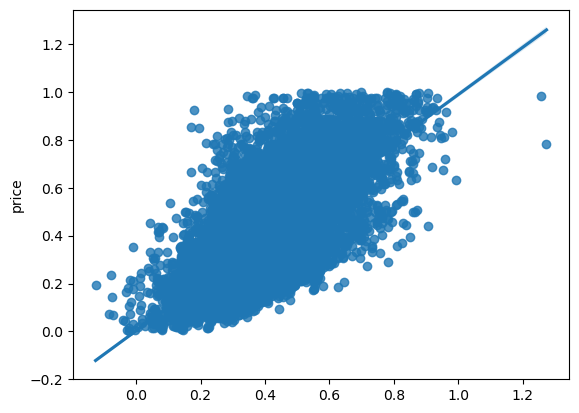

In [89]:
sns.regplot(x=y_predict,y=ytest)

Summery

Dataset Exploration
The initial phase involved exploring the dataset to understand its structure, dimensions, and basic statistical properties. Key steps included:

Loading the dataset into a pandas DataFrame.
Inspecting the first few rows using head() to get a preview of the data.
Checking the data types and missing values with info() and isnull().sum().
Describing the dataset statistically with describe() to understand distributions, means, and standard deviations.
Data Preprocessing
Data preprocessing was essential to clean and prepare the data for analysis and modeling:

Handling missing values through imputation or removal.
Encoding categorical variables using techniques such as one-hot encoding for nominal categories and ordinal encoding for ordinal categories.
Addressing outliers through methods like z-score analysis or IQR filtering.
Exploratory Data Analysis (EDA)
EDA was performed to uncover underlying patterns and relationships within the data:

Visualizing distributions of numerical features using histograms and density plots.
Analyzing relationships between features using scatter plots and pair plots.
Examining correlations between features through a heatmap of the correlation matrix.
Feature Scaling
To ensure features contributed equally to the model and improved convergence during training:

Standardization was applied using StandardScaler to scale features to have a mean of 0 and a standard deviation of 1.
Train-Test Split
The dataset was split into training and testing sets to evaluate the model’s performance on unseen data:

Using train_test_split from scikit-learn, the data was divided with a typical 80-20 or 70-30 split ratio, ensuring a representative distribution in both sets.
Linear Regression Model
A linear regression model was developed to predict the target variable based on input features:

The LinearRegression class from scikit-learn was utilized.
The model was fitted to the training data using fit().
Model Evaluation
The model’s performance was evaluated on the testing set using several metrics:

Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) provided insight into the model's predictive accuracy.
The R-squared value was calculated to assess the proportion of variance in the dependent variable that was predictable from the independent variables.
Visualization
Visualizations were created to interpret and present the model’s results:

The regression line was plotted against the actual data points to visualize the fit.
Residual plots were generated to check for homoscedasticity and identify any patterns in prediction errors.
Feature importance or coefficients were plotted to understand the contribution of each feature to the model.
Conclusion
This process provided a systematic approach to developing a linear regression model, from data exploration and preprocessing to model evaluation and visualization. Each step was crucial in ensuring the model was accurate, interpretable, and capable of making reliable predictions on new data.